### visualize the pair_files (5 taxonomys)
- `seqs_taxo.pkl`

In [1]:
import pickle
from collections import defaultdict
import ast
import pandas as pd
import matplotlib as mpl
# import seaborn as sns
# mpl.get_backend()
import matplotlib.pyplot as plt
import numpy as np
from pyforest import *
from icecream import ic

In [2]:
"""seqs_tax.pkl (This file does not contain the common sequence data. Only the raw data.)
key: taxo_name
value: [SeqRecord(o.seq, o.id. o.name, o.description), ...] len(v) means how many orgranisms are in this taxonomy.

optional:
    If need the consensus strings, need to read con_file/{k}.txt
"""

seqs_taxo = defaultdict(list)
with open('pkl/seqs_taxo_5_total.pkl','rb') as f: # Five large species
    seqs_taxo = pickle.load(f)
# with open('pkl/seqs_species_8.pkl','rb') as f: # Eight small speceis
#     seqs_taxo = pickle.load(f)
# print(seqs_taxo)
# {k:name : v:full_sequence}
print(seqs_taxo.keys())

<IPython.core.display.Javascript object>

dict_keys(['Total', 'Bacteria', 'Eukaryota', 'Archaea', 'Viruses', 'other sequences'])


In [3]:
len(seqs_taxo['Total'])

24707

In [10]:
"""(Skip) pair counts in Consensus sequence.
"""
stat_all = defaultdict(list)
dict_all = dict()
for k, v in seqs_taxo.items(): # Missing some minor keys.
    # Read the pair_files/.txt, which is generated from gb_analysis.ipynb.
    with open(f'pair_files/{k}.txt') as f:
        list_pair = ast.literal_eval(f.read()) # list[tuple(2)]
        stat_all['tname'].append(k)
        stat_all['tlist'].append(list_pair)
        stat_all['tnum'].append(len(v))
        dict_all[k] = list_pair
len(dict_all)

200

In [4]:
dict_all['Bacteria']

NameError: name 'dict_all' is not defined

In [11]:
len(stat_all['tname'])

200

In [14]:
stat_dat = pd.DataFrame(stat_all)

In [15]:
stat_dat.columns

Index(['tname', 'tlist', 'tnum'], dtype='object')

In [16]:
stat_dat.index

RangeIndex(start=0, stop=200, step=1)

In [18]:
df = pd.DataFrame(stat_dat)

In [19]:
df

,tname,tlist,tnum
0,Bacteria,"[(nucleophilic - hydrophobic, 1617), (hydropho...",15579
1,Proteobacteria,"[(nucleophilic - hydrophobic, 651), (hydrophob...",3187
2,Betaproteobacteria,"[(nucleophilic - hydrophobic, 521), (nucleophi...",159
3,Burkholderiales,"[(nucleophilic - hydrophobic, 560), (nucleophi...",119
4,Firmicutes,"[(nucleophilic - hydrophobic, 118), (hydrophob...",8306
...,...,...,...
195,Peptostreptococcus,"[(hydrophobic - basic, 154), (nucleophilic - h...",318
196,Pseudomonadaceae,"[(nucleophilic - hydrophobic, 1151), (hydropho...",713
197,Pseudomonas,"[(nucleophilic - hydrophobic, 1151), (hydropho...",713
198,Rathayibacter,"[(nucleophilic - hydrophobic, 71), (nucleophil...",184


In [26]:
"""Generate all the 200 taxonomies paired AAs histograms from df."""
for i in range(200):
    pairs = df.iloc[i]['tlist']
    num = df.iloc[i]['tnum']
    name = df.iloc[i]['tname']
    labels, values = zip(*pairs)
    indexes = np.arange(len(labels))
    width = 1

    fig = plt.figure(figsize=(20,8))
    plt.barh(indexes, values, width)
    plt.yticks(indexes + width * 0.5, labels)
    plt.title(f'{name} pairwise frequency: adjacent residues ({num} adhesive proteins)')
    # plt.show()
    plt.savefig(f'hists-svg/{name}.svg')
    plt.close(fig)

# For single As(subgroup) ratio analysis.

In [4]:

from Bio import AlignIO
from Bio import SeqIO
from Bio.Align import AlignInfo
from Bio.SeqRecord import SeqRecord
from tqdm import tqdm, trange
from icecream import ic
import collections

# from utils import *
import sequence_utils

from importlib import reload; reload(sequence_utils)
from sequence_utils import *

In [6]:
check_aa_ratios_overal(seqs_taxo['Total'], 'P')

(103536, 5083501, 0.020367065925628813)

### Figure 2B

In [5]:
"""For Total sequence, but compute directly from the one sequence ratios."""
stat_dict = defaultdict(list)

# Iterate in the aln_files folder, producing con_files/*
for k, v in tqdm(seqs_taxo.items()):
    # align = AlignIO.read(f"aln_files/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    stat_dict['tname'].append(k)
    # consensus = SeqIO.read(f'con_files/{k}.txt', 'fasta')
    # with open(f'con_files/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*
    aa_dict, sum_counts = process_seq_list_include_small(v)
    

    stat_dict['hydrophobic'].append(aa_dict['hydrophobic']*100/sum_counts)
    stat_dict['nucleophilic'].append(aa_dict['nucleophilic']*100/sum_counts)
    stat_dict['aromatic'].append(aa_dict['aromatic']*100/sum_counts)
    stat_dict['acidic'].append(aa_dict['acidic']*100/sum_counts)
    stat_dict['amide'].append(aa_dict['amide']*100/sum_counts)
    stat_dict['basic'].append(aa_dict['basic']*100/sum_counts)
    stat_dict['small'].append(aa_dict['small']*100/sum_counts)

stat_df = pd.DataFrame(stat_dict)


  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:19<00:00,  3.17s/it]


In [6]:
stat_df.head(20)
# new_df = stat_df.drop(columns='aa_sum')
# from summarytools import summarytools
# summarytools.dfSummary(new_df)

# from skimpy import skim
# skim(new_df)

# from ydata_profiling import ProfileReport
# report = ProfileReport(new_df)
# report.to_notebook_iframe()
# report.to_widgets()
# report.to_file('my_report.html')

# import sweetviz as sv
# report = sv.analyze(new_df)
# report.show_notebook()

# from dataprep.eda import create_report
# create_report(new_df)

,tname,hydrophobic,nucleophilic,aromatic,acidic,amide,basic,small
0,Total,26.347698,18.111770,7.132515,11.818277,8.958392,10.366212,17.265136
1,Bacteria,26.863475,17.073723,6.813734,11.966159,8.912291,9.198428,19.172190
2,Eukaryota,25.550768,19.750975,7.613095,11.483111,9.029304,12.198525,14.374221
3,Archaea,26.271663,15.415879,7.825520,20.792649,8.830070,7.808905,13.055314
4,Viruses,28.722892,12.313253,10.843373,11.759036,13.253012,11.855422,11.253012
5,other sequences,25.682365,19.120351,8.358082,10.550134,8.160091,12.346203,15.782775


In [104]:
# stat_df_simp = stat_df.drop(columns='aa_sum')
# stat_df_simp.to_csv('single_stats.csv', float_format='{:.2f}'.format)

In [10]:
plt.style.use('seaborn-bright')
# import scienceplots
# plt.style.use('science')
# plt.style.use('ipynb')

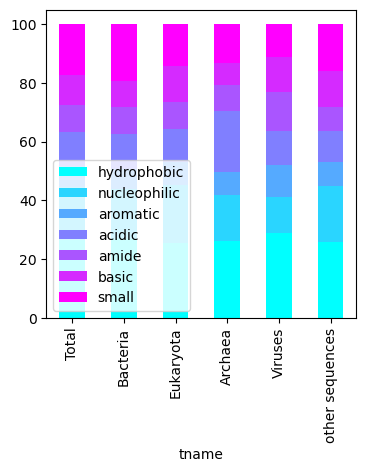

In [15]:
stat_df.plot(
    x = 'tname',
    kind = 'bar',
    stacked = True,
    # title = 'Stacked Bar Graph',
    mark_right = True, figsize=(4,4), colormap='cool')
# plt.savefig('csv/subgroup_ratio_raw_small_8_p.pdf', bbox_inches='tight')
# plt.savefig('csv/subgroup_ratio_raw_p.pdf', bbox_inches='tight')
plt.savefig('csv/subgroup_ratio_raw_2B_small.pdf', bbox_inches='tight')

In [16]:
# stat_df.to_csv('csv/subgroup_ratio_raw_small_8_p.csv')
# stat_df.to_csv('csv/subgroup_ratio_raw_p.csv')
stat_df.to_csv('csv/subgroup_ratio_raw_2B_small.csv')

### Figure 2D: Pair stacked bar graph computation (pair counts) for Total.

In [17]:
"""seqs_tax.pkl (This file does not contain the common sequence data. Only the raw data.)
key: taxo_name
value: [SeqRecord(o.seq, o.id. o.name, o.description), ...] len(v) means how many orgranisms are in this taxonomy.

optional:
    If need the consensus strings, need to read con_file/{k}.txt
"""

seqs_taxo = defaultdict(list)
# If need change the 8 species, just read the others (5 species).
with open('pkl/seqs_species_8.pkl','rb') as f:
    seqs_taxo = pickle.load(f)
# print(seqs_taxo)
# {k:name : v:full_sequence}
print(seqs_taxo.keys())

<IPython.core.display.Javascript object>

dict_keys(['Proteobacteria', 'Arthropoda', 'Cnidaria', 'Chordata', 'Stramenopiles', 'Echinodermata', 'Lophotrochozoa', 'Platyhelminthes'])


In [5]:

stat_dict = defaultdict(list)
first = defaultdict(int)
second = defaultdict(int)
third = defaultdict(int)
fourth = defaultdict(int)
fifth = defaultdict(int)
rank_dict = {'1st': first, '2nd': second, '3rd': third, '4th': fourth, '5th': fifth}
subgroup_dict = {}

# Iterate in the aln_files folder, producing con_files/*
for k,v in seqs_taxo.items():
    # align = AlignIO.read(f"aln_files/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    # stat_dict['tname'].append(k)
    # consensus = SeqIO.read(f'con_files/{k}.txt', 'fasta')
    # with open(f'con_files/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*
    
    subgroup = process_pair_list_include_small(v)
    subgroup_dict[k] = subgroup
    
    # c.most_common()
    # with open(f'single_files/{k}.txt', 'w') as f:
    #     print(c.most_common(), file=f)
    """Top 5 pairs cut.
    """




In [6]:
subgroup_df = pd.DataFrame(subgroup_dict)
subgroup_df

,Total,Bacteria,Eukaryota,Archaea,Viruses,other sequences
acidic - basic,432072,249570,178948,3243,154,157
small - acidic,732918,500060,226948,5571,93,246
hydrophobic - basic,913370,522688,387098,2886,292,406
small - hydrophobic,1426587,963741,456794,5259,258,535
hydrophobic - acidic,996736,628389,359419,8299,260,369
small - basic,525535,299376,224551,1197,107,304
hydrophobic - hydrophobic,1171167,707233,457187,5858,377,512
hydrophobic - aromatic,570922,334382,233726,2285,252,277
amide - basic,302862,170934,130419,1266,113,130
basic - basic,205455,92587,112222,454,65,127


In [8]:
sorted_df = subgroup_df.sort_values(by=['Total'], ascending=False)
for col in sorted_df.columns:
    sorted_df[col] = sorted_df[col] / sum(sorted_df[col])
sorted_df

,Total,Bacteria,Eukaryota,Archaea,Viruses,other sequences
nucleophilic - hydrophobic,0.102107,0.103708,0.099755,0.094963,0.054440,0.098342
small - hydrophobic,0.085910,0.096117,0.070389,0.067351,0.062424,0.075811
hydrophobic - hydrophobic,0.070528,0.070534,0.070450,0.075023,0.091217,0.072552
small - nucleophilic,0.062770,0.068887,0.053632,0.039663,0.022018,0.052714
hydrophobic - acidic,0.060024,0.062671,0.055384,0.106284,0.062908,0.052289
hydrophobic - basic,0.055004,0.052129,0.059650,0.036961,0.070651,0.057532
hydrophobic - amide,0.047486,0.047314,0.047837,0.039163,0.077426,0.043361
small - acidic,0.044137,0.049872,0.034971,0.071347,0.022502,0.034859
nucleophilic - acidic,0.038844,0.037826,0.040025,0.071565,0.037987,0.037693
nucleophilic - nucleophilic,0.034695,0.027723,0.045632,0.020939,0.018631,0.043503


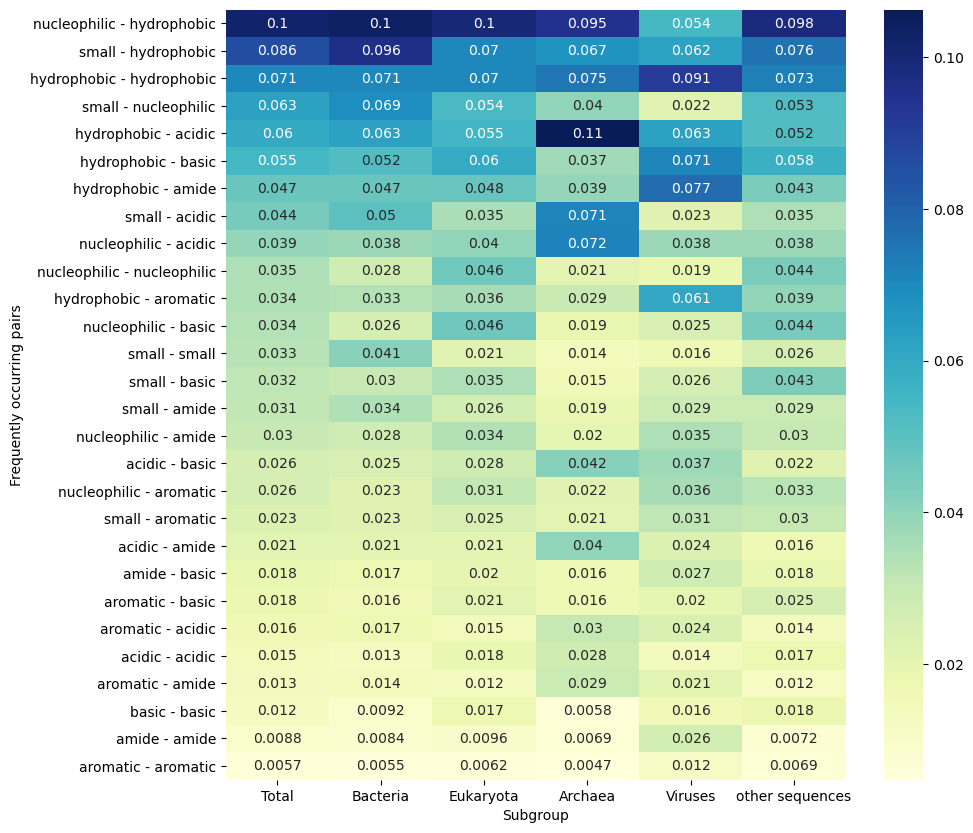

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(sorted_df, annot=True, cmap="YlGnBu", ax=ax)
ax.set_xlabel("Subgroup")
ax.set_ylabel("Frequently occurring pairs")
plt.savefig("csv/total_paircounts_heatmap_2D_small_x_axis.pdf", bbox_inches="tight")

In [10]:
sorted_df.to_csv('csv/total_paircounts_heatmap_2D_small_x_axis.csv')

In [22]:
stat_df.head()

,tname,hydrophobic,nucleophilic,aromatic,acidic,amide,basic,small
0,Total,26.347698,18.111770,7.132515,11.818277,8.958392,10.366212,17.265136
1,Bacteria,26.863475,17.073723,6.813734,11.966159,8.912291,9.198428,19.172190
2,Eukaryota,25.550768,19.750975,7.613095,11.483111,9.029304,12.198525,14.374221
3,Archaea,26.271663,15.415879,7.825520,20.792649,8.830070,7.808905,13.055314
4,Viruses,28.722892,12.313253,10.843373,11.759036,13.253012,11.855422,11.253012


In [84]:
stat_df['aa_sum'][0]

[('nucleophilic - hydrophobic', 1617),
 ('hydrophobic - acidic', 879),
 ('nucleophilic - acidic', 734),
 ('nucleophilic - nucleophilic', 708),
 ('hydrophobic - hydrophobic', 660)]

In [98]:
stat_df_simp = stat_df.drop(columns='aa_sum')
stat_df_simp.to_csv('pair_stats.csv', float_format='{:.2f}'.format)

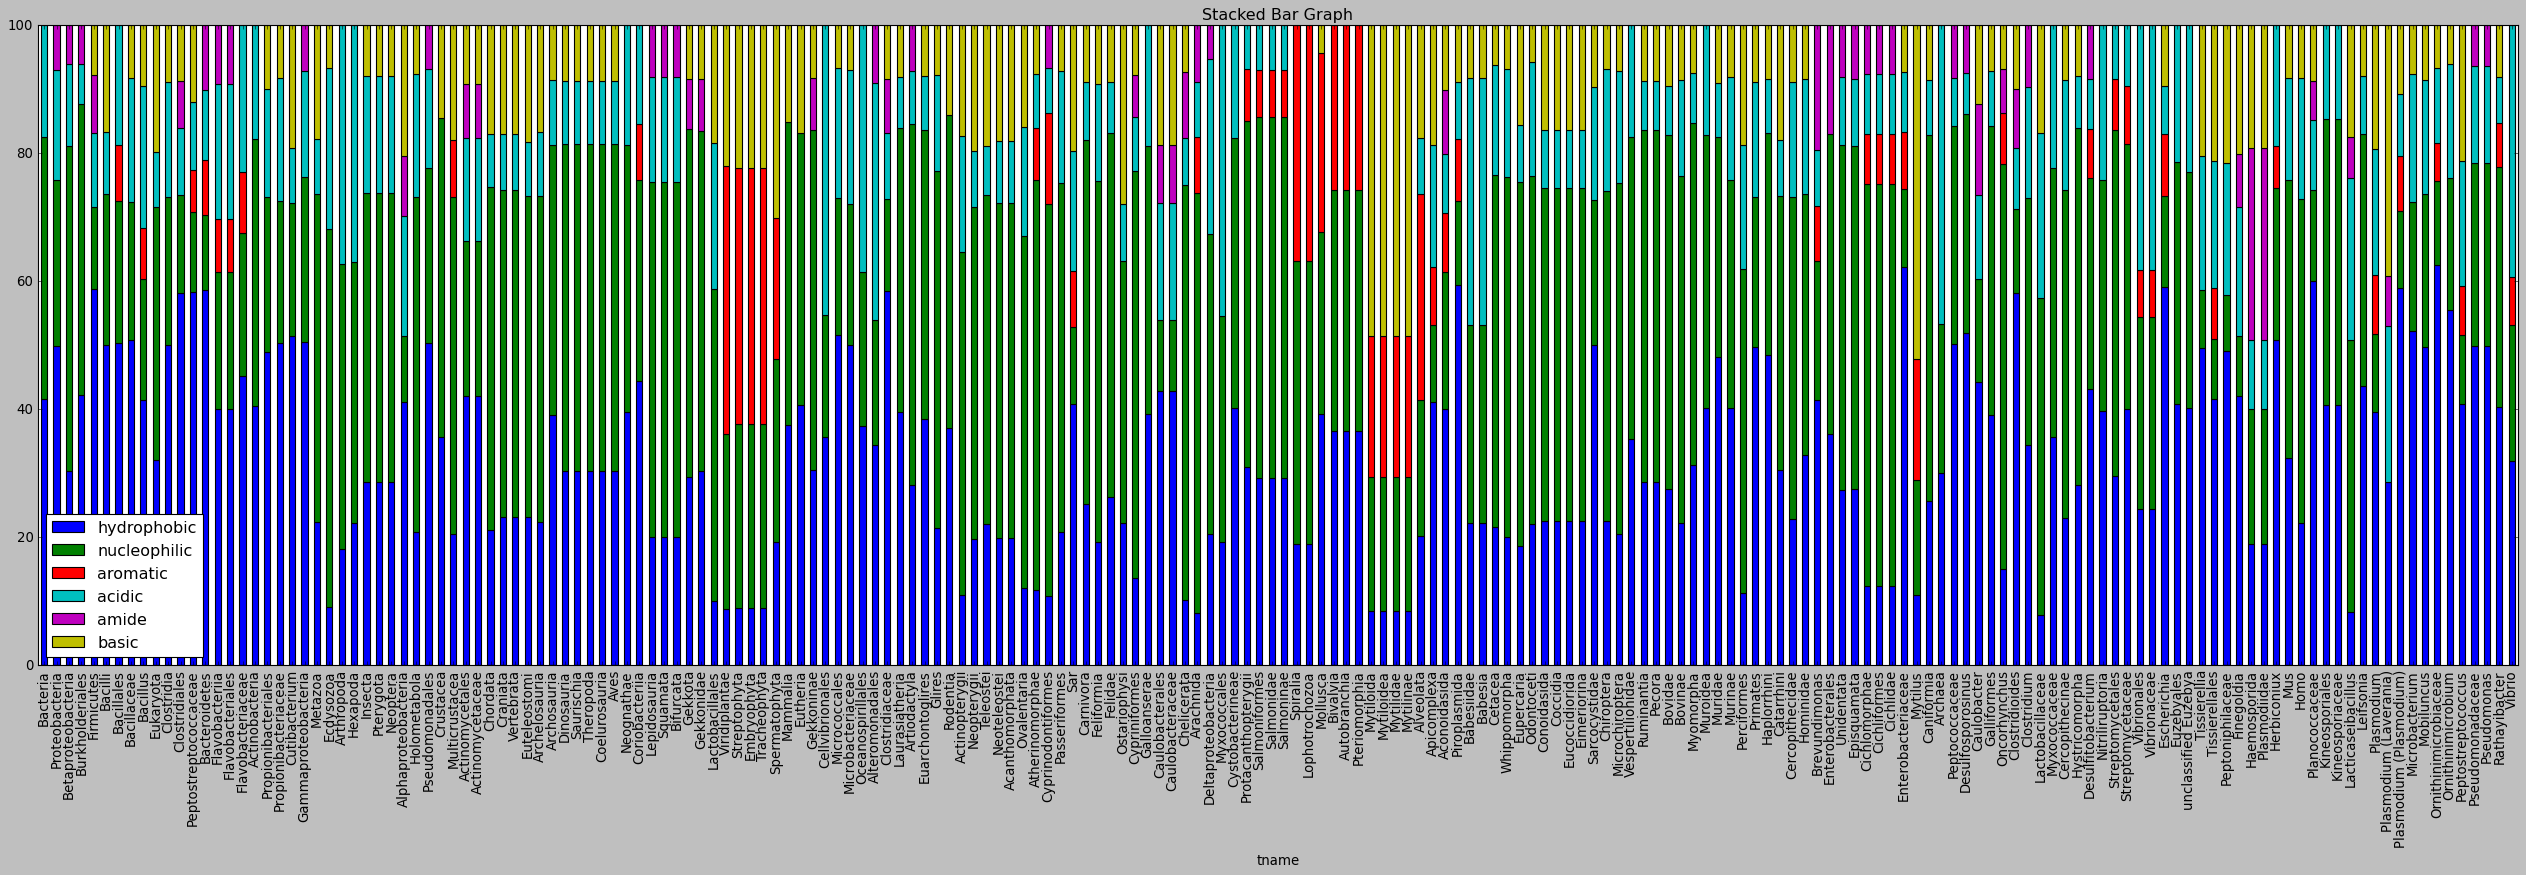

In [100]:
stat_df_simp.plot(
    x = 'tname',
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True, figsize=(40,10))

plt.savefig('pdf/pair_stack_bar.pdf', bbox_inches='tight')

### Figure 2C: Contiguted As block distribution counts. (block_size)

In [35]:

import sequence_utils

from importlib import reload; reload(sequence_utils)
from sequence_utils import *

seqs_taxo = defaultdict(list)
with open('pkl/seqs_taxo_5_total.pkl','rb') as f: # Five large species
    seqs_taxo = pickle.load(f)
# with open('pkl/seqs_species_8.pkl','rb') as f: # Eight small speceis
#     seqs_taxo = pickle.load(f)
# print(seqs_taxo)
# {k:name : v:full_sequence}
print(seqs_taxo.keys())

<IPython.core.display.Javascript object>

dict_keys(['Total', 'Bacteria', 'Eukaryota', 'Archaea', 'Viruses', 'other sequences'])


  1%|          | 138/24707 [00:00<00:17, 1366.54it/s]

100%|██████████| 24707/24707 [00:13<00:00, 1835.67it/s]


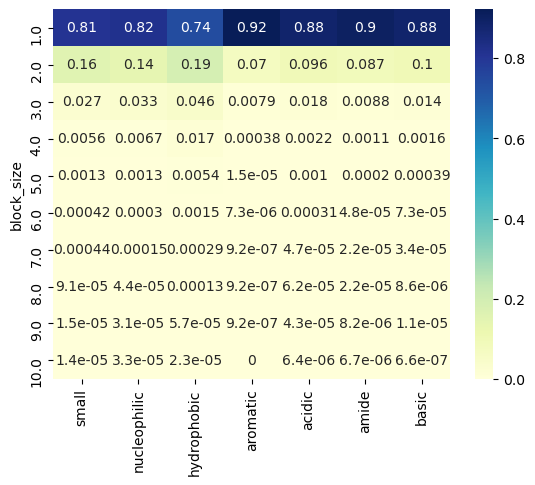

In [37]:

from itertools import groupby
import seaborn as sns
stat_dict = defaultdict(list)
block_max = 10
mat = np.zeros((block_max, 8))

# Iterate in the aln_files folder, producing con_files/*
for v in tqdm(seqs_taxo['Total']):
    # align = AlignIO.read(f"aln_files/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    # stat_dict['tname'].append(k)
    # consensus = SeqIO.read(f'con_files/{k}.txt', 'fasta')
    # with open(f'con_files/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*
    one_mat = fill_heatmap_mat_include_small(v.seq)
    mat += one_mat


    # Note that df.plot(kind=) in default use the first column as the index, i.e. the x axis.
    # This time not use defaultdict(list), but use np.zeros to generte the ndarrays to store data and fill it out.

mat[:,0] = np.array(list(range(1, block_max+1)))
mat_percent = np.zeros((block_max, 8))

for i in range(10):
    for j in range(1,8):
        mat_percent[i][j] = mat[i][j]/np.sum(mat[:,j])

mat_percent[:,0] = np.array(list(range(1, block_max+1)))

df = pd.DataFrame(mat_percent, columns=['block_size', 'small', 'nucleophilic', 'hydrophobic','aromatic', 'acidic', 'amide', 'basic'])
# """
        #    '2': 'nucleophilic',
        #    '3': 'hydrophobic',
        #    '4': 'aromatic',
        #    '5': 'acidic',
        #    '6': 'amide',
        #    '7': 'basic'}
        #    """
# stat_all = defaultdict(list)
# stat_all['block_size'] = list(range(1, block_max+1))
# ic(mc)
# ic(groups)
df_index = df.set_index('block_size')

sns.heatmap(df_index, annot=True, cmap="YlGnBu")
plt.savefig(f'csv/block_size_heatmap_2C_small.pdf', bbox_inches='tight')
# plt.savefig(f'SI_figs/heatmap/{k}_heatmap.pdf', bbox_inches='tight')
# plt.clf()


In [38]:
df_index.to_csv('csv/block_size_heatmap_2C_small.csv')